In [1]:
from synthetic_data import *
from projected_gradient_descent import *
from alternative_minimization import *
from logdet import *
from performance_eval import *
from scipy.io import loadmat

## Real Data

In [2]:
brain_graphs = loadmat('sc-fc-ts_norm.mat')
TS = brain_graphs['TS']
SC = brain_graphs['sCall']

X = TS[:, :, 7].squeeze()
W_orig = SC[:, :, 7]
L_orig = np.diag(np.sum(W_orig, axis=0)) - W_orig
print(X.shape)

(68, 661)


## Alternative Minimization (Primal formulation for $L$)

iteration #0
primal value is 130.3032226740986
iteration-0: obj value = 129.57387915167618
iteration #1
primal value is 128.8458056346307
iteration-1: obj value = 129.53494864252463
iteration #2
primal value is 128.8869337945149
iteration-2: obj value = 129.59286953366205
iteration #3
primal value is 128.87252792172603
iteration-3: obj value = 129.5596884396998
iteration #4
primal value is 128.85466694927513
iteration-4: obj value = 129.59390937845006
iteration #5
primal value is 128.90036098237934
iteration-5: obj value = 129.60888608578006
iteration #6
primal value is 128.8862870596805
iteration-6: obj value = 129.5983313247728
iteration #7
primal value is 128.90325644118332
iteration-7: obj value = 129.6092528270214
iteration #8
primal value is 128.80396827531678
iteration-8: obj value = 129.56053295279406
iteration #9
primal value is 128.8925768446891
iteration-9: obj value = 129.59368325091305


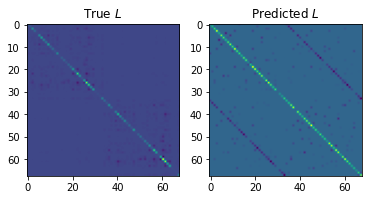

condition positive:1055, prediction positive:143, true_positive:114


/home/psycuser/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


ValueError: too many values to unpack (expected 4)

In [3]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 10

L_opt, Y_opt = alternative_minimization(X, alpha=alpha, beta=beta, num_iters=num_iters, dual=False)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}")

## Alternative Minimization (Dual formulation for $L$)

iteration #0
dual value is 130.34774309318507
iteration-0: obj value = 129.6203738839666
iteration #1
dual value is 128.9010569457306
iteration-1: obj value = 129.61819603126224
iteration #2
dual value is 128.8967684590876
iteration-2: obj value = 129.61819337086575


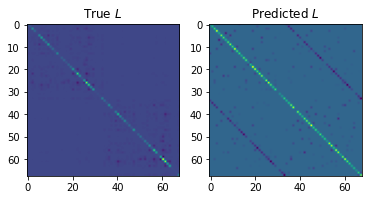

condition positive:1055, prediction positive:137, true_positive:110
precision:0.8029197080291971, recall:0.10426540284360189, f-score:0.18456375838926176, NMI:0.039345419423955356, pearson R:0.20619730480836207


In [4]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 10

L_opt, Y_opt = alternative_minimization(X, alpha=alpha, beta=beta, num_iters=num_iters, dual=True)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")

## Projected Gradient Descent

/home/psycuser/.local/lib/python3.6/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


final objective value = 129.52643011791295
final objective value = 129.60439535305272
final objective value = 129.65931048119884
final objective value = 129.59676311057171
final objective value = 129.55094426970317
final objective value = 129.55744648871416
final objective value = 129.50647187938088
final objective value = 129.56008187486606
final objective value = 129.57586612782154
final objective value = 129.56790260561496


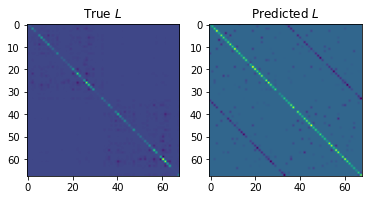

condition positive:1055, prediction positive:157, true_positive:117
precision:0.7452229299363057, recall:0.11090047393364928, f-score:0.19306930693069305, NMI:0.029224012156546037, pearson R:0.2065209384851748


In [5]:
n, p = X.shape
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 1000
eta_L = 0.1
eta_Y = 0.1
    
num_inits = 10
objective_values = np.zeros((num_inits))
L_opt_values = np.zeros((n, n, num_inits))
Y_opt_values = np.zeros((n, p, num_inits))


for idx_init in range(num_inits):

    L_init = project_L(np.random.rand(n,n))

    ret_tuple = proj_grad_descent(X, alpha=alpha, beta=beta, L_init=L_init, 
                                  num_iters=num_iters, eta_L=eta_L, eta_Y=eta_Y)
   
    L_opt_values[:, :, idx_init] = ret_tuple[0]
    Y_opt_values[:, :, idx_init] = ret_tuple[1]
    objective_values[idx_init] = ret_tuple[2]

idx_init_best = np.argmin(objective_values)
L_opt = L_opt_values[:, :, idx_init_best]
Y_opt = Y_opt_values[:, :, idx_init_best]
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")

## Method for comparison

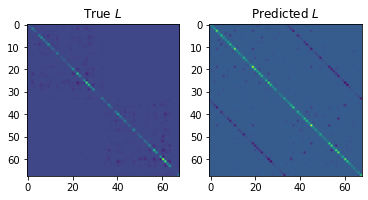

condition positive:1055, prediction positive:259, true_positive:173
precision:0.667953667953668, recall:0.16398104265402844, f-score:0.2633181126331811, NMI:0.022056281836633537, pearson R:0.2297267511310778


In [6]:
lam = 1e1
L_opt = logdet(X, lam)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")